In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
# Load dataset
df = pd.read_csv("music_with_weather_mood.csv")

# Convert Event Start Timestamp to datetime
df['Event Start Timestamp'] = pd.to_datetime(df['Event Start Timestamp'])

# Extract hour of day (0-23)
df['hour'] = df['Event Start Timestamp'].dt.hour

# Select all numeric features (including song_mood, weather features, and hour)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Target
target = 'combined_mood'

# Ensure target is in numeric columns
if target not in numeric_cols:
    raise ValueError(f"{target} not found in numeric columns!")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Artist Name               1000 non-null   object             
 1   Content Name              1000 non-null   object             
 2   Event Start Timestamp     1000 non-null   datetime64[ns, UTC]
 3   Event Received Timestamp  1000 non-null   object             
 4   Event End Timestamp       1000 non-null   object             
 5   track_id                  1000 non-null   object             
 6   album_name                1000 non-null   object             
 7   popularity                1000 non-null   int64              
 8   duration_ms               1000 non-null   int64              
 9   explicit                  1000 non-null   bool               
 10  danceability              1000 non-null   float64            
 11  energy            

In [17]:
# Features
X = df[numeric_cols].drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest R^2: 0.998
Random Forest MSE: 0.016
Feature Importances:
song_mood           0.889907
weather_mood        0.095866
acousticness        0.008323
hour                0.000602
valence             0.000580
speechiness         0.000553
tempo               0.000542
instrumentalness    0.000505
loudness            0.000473
danceability        0.000465
popularity          0.000459
duration_ms         0.000418
energy              0.000407
liveness            0.000396
key                 0.000318
time_signature      0.000129
mode                0.000058
dtype: float64


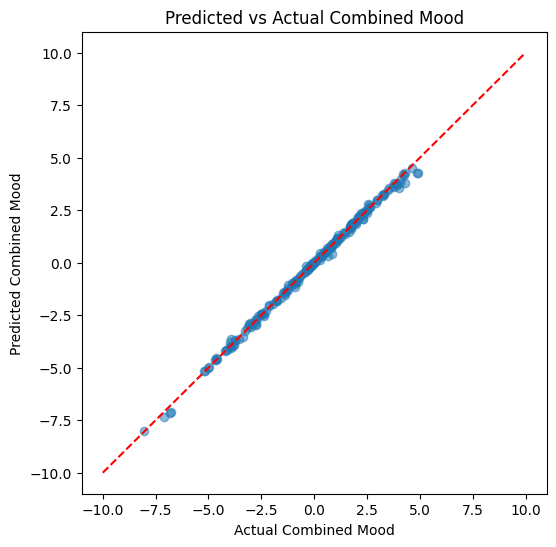

In [18]:
# Train Random Forest regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R^2: {r2:.3f}")
print(f"Random Forest MSE: {mse:.3f}")

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(importances)

# Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Combined Mood")
plt.ylabel("Predicted Combined Mood")
plt.title("Predicted vs Actual Combined Mood")
plt.plot([-10, 10], [-10, 10], color='red', linestyle='--')
plt.show()


In [19]:
# Save model
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Random Forest model saved as music_weather_mood_model.pkl")

Random Forest model saved as music_weather_mood_model.pkl


Weather Mood prediction

In [3]:
# Load dataset
df = pd.read_csv("weather_with_mood.csv")

# Convert Event Start Timestamp to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract hour of day (0-23)
df['hour'] = df['time'].dt.hour

# Select all numeric features (including song_mood, weather features, and hour)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Target
target = 'weather_mood'

# Ensure target is in numeric columns
if target not in numeric_cols:
    raise ValueError(f"{target} not found in numeric columns!")



In [4]:
# Features
X = df[numeric_cols].drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest R^2: 0.997
Random Forest MSE: 0.014
Feature Importances:
cloud_cover (%)              0.854051
temperature_2m (°C)          0.135637
apparent_temperature (°C)    0.005852
rain (mm)                    0.002031
weather_code (wmo code)      0.001105
relative_humidity_2m (%)     0.000932
hour                         0.000392
dtype: float64


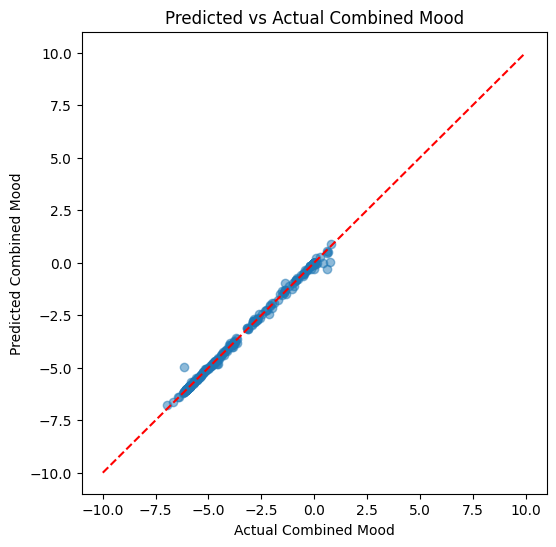

In [5]:
# Train Random Forest regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R^2: {r2:.3f}")
print(f"Random Forest MSE: {mse:.3f}")

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(importances)

# Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Combined Mood")
plt.ylabel("Predicted Combined Mood")
plt.title("Predicted vs Actual Combined Mood")
plt.plot([-10, 10], [-10, 10], color='red', linestyle='--')
plt.show()


In [6]:
# Save model
import pickle
with open("weather_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Random Forest model saved as weather_model.pkl")

Random Forest model saved as weather_model.pkl


In [11]:
df = pd.read_csv("music_with_weather_mood.csv")
print(len(df))
print(df.columns)
print(df.head(5))

1000
Index(['Artist Name', 'Content Name', 'Event Start Timestamp',
       'Event Received Timestamp', 'Event End Timestamp', 'track_id',
       'album_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'song_mood', 'weather_mood', 'combined_mood'],
      dtype='object')
         Artist Name                                Content Name  \
0         Nogizaka46                                       月の大きさ   
1           Ferrugem        Tô isso aqui pra te beijar - Ao Vivo   
2             Kemuel  Ressuscitou (Resurrecting) [Kemuel Nation]   
3  DJ Furax;Redshark        F***k Orgus (Dance) - Dr. Rude Remix   
4       BaianaSystem                      Jah Jah Revolta, Pt. 2   

              Event Start Timestamp  Event Received Timestamp  \
0  2025-10-28 06:36:23.035000+00:00  2025-10-28T06:36:28.035Z   
1 